## **US Airline Passenger Satisfaction**

by Abraham Adiguna Kurnia Tarra
____

## **`Business Problem`**

**Context**

Kepuasan pelanggan adalah refleksi dari tingkat kesenangan, kepuasan, dan harapan yang terpenuhi dari pelanggan terhadap produk atau layanan yang mereka peroleh dari suatu perusahaan. Kepuasan pelanggan juga bisa mencakup aspek-aspek seperti interaksi dengan karyawan, proses pemesanan, pengiriman, dan layanan purna jual.

Kepuasan pelanggan memiliki dampak yang signifikan terhadap kesuksesan bisnis. Pelanggan yang puas cenderung menjadi pelanggan setia, memberikan ulasan positif, merekomendasikan kepada orang lain, dan melakukan pembelian berulang. Sebaliknya, pelanggan yang tidak puas dapat berdampak buruk terhadap reputasi perusahaan dan potensial mengakibatkan kehilangan pelanggan.

Suatu maskapai penerbangan melakukan survei dengan tujuan untuk mengetahui kepuasan penumpang agar dapat meningkatkan kualitas pelayanan maskapai yang akan berdampak pada kinerja perusahaan, baik secara finansial maupun non-finansial.

**Problem Statement**

Perusahaan ingin melakukan evaluasi pelayanan maskapai berbasis kepuasan penumpang. Penumpang maskapai penerbangan diminta untuk memberikan penilaian dengan rentang 1(buruk) sampai dengan 5(baik) terhadap pelayanan maskapai yang meliputi aspek kebersihan, kenyamanan, layanan check-in, dan lainnya. Informasi ini akan membantu perusahaan untuk menentukan aspek pelayanan yang harus dipertahankan dan aspek yang membutuhkan peningkatan kualitas, agar improvement yang dilakukan tepat sasaran dan efisien.

Berikut rumusan masalah dari pernyataan diatas:

- Apakah penumpang merasa puas dengan layanan yang diberikan?
- Apa saja faktor yang mempengaruhi kepuasan penumpang?

----

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import normaltest, chi2_contingency

## **`Analysis`**

In [3]:
df=pd.read_csv(r'H:\Airline Passenger Satisfaction\data\processed\Airline Data Clean CSV.csv')
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_of_Online_Booking,Gate_Location,...,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_in_Minutes,Satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,satisfied


Untuk mempermudah analisa, khusus untuk kolom rating hasil survey akan dibuat tabel baru

In [15]:
kolom = pd.Series(df.columns)
TabelRating = pd.DataFrame(columns=kolom[6:20], data= df[:])
TabelRating['Satisfaction']=df['Satisfaction'][:]
TabelRating.head()

,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_of_Online_Booking,Gate_Location,Food_and_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Satisfaction
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5,satisfied
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3,satisfied


## **| Tingkat Kepuasan Penumpang**

In [4]:
df['Satisfaction'].value_counts()

neutral or dissatisfied    58345
satisfied                  43268
Name: Satisfaction, dtype: int64

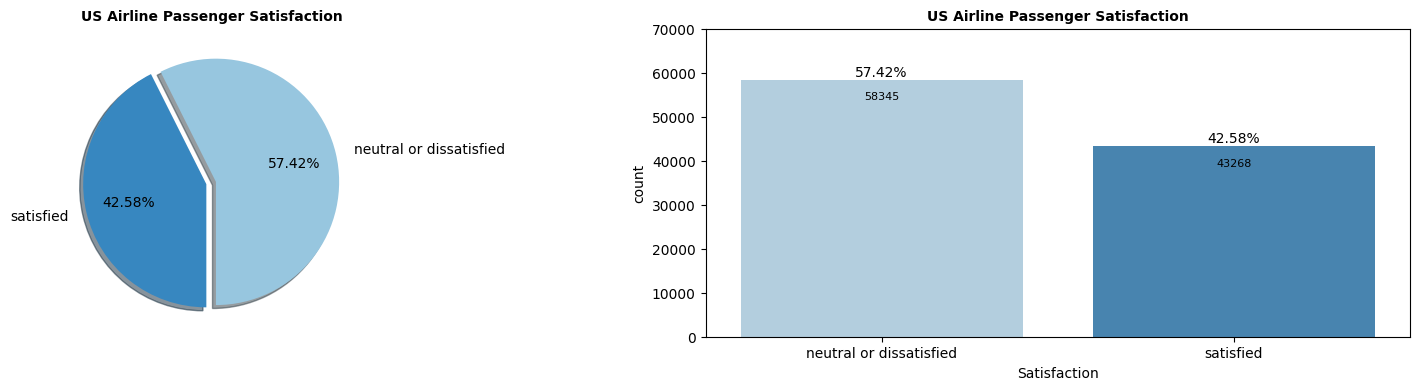

In [13]:
# Mengatur proporsi grafik
fig, axes = plt.subplots(1, 2, figsize=(20,4))
plt.style.use('default')
cmap = plt.get_cmap('Blues')

# create pie chart
temp_df = df.Satisfaction.value_counts(normalize=True) * 100
axes[0].pie(df['Satisfaction'].value_counts(), labels=['neutral or dissatisfied','satisfied'], colors=cmap([100, 170]), autopct='%0.2f%%', 
        startangle=270, pctdistance=0.65, labeldistance=1.15, explode=(0.03, 0.05), shadow=True)
# set title
axes[0].set_title('US Airline Passenger Satisfaction', fontsize=10, weight='bold')

# create barplot
plt.title("US Airline Passenger Satisfaction", fontsize=10, weight='bold')
# set title dan 
ax = sns.countplot(data=df, x="Satisfaction", palette="Blues")
ax.set_ylim([0, 70000])
# annotation
for p in ax.patches:
        percentage = f'{100 * p.get_height() / len(df):.2f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')

for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center',
                    size=8,
                    xytext = (0, -12), 
                    textcoords = 'offset points')

plt.show();

**Insight**
- Dari grafik diatas dapat dilihat bahwa lebih banyak penumpang yang netral atau tidak puas dengan pelayanan yang diberikan maskapai penerbangan sebanyak 57,42%. 

----

## **| Faktor Yang Mempengaruhi Kepuasan Penumpang**

Analisa faktor yang mempengaruhi kepuasan penumpang dilakukan dengan cara melakukan segmentasi penumpang sesuai klasifikasi penumpang:
- Gender
- usia
- Kelas Penerbangan 

Untuk mempersingkat analisa, dibuat fungsi sesuai dengan kebutuhannya. Semua fungsi yang digunakan dirangkum disini.

In [38]:
# Fungsi Tabel Kategori terhadap Kepuasan Penumpang
def TabelProporsiKepuasan(Data,Satisfaction,df):
    # Membuat crosstab
    Jumlah = pd.crosstab(df[Data],df[Satisfaction])
    Proporsi=pd.crosstab(df[Data],df[Satisfaction],normalize='index').round(4)*100
    # Menggabungkan Tabel
    TabelKepuasan = pd.merge(Jumlah, Proporsi,on=Data)
    TabelKepuasan.insert(2,'Total',(pd.crosstab(df[Data],df[Satisfaction]).sort_index().sum(axis=1)))
    TabelKepuasan.rename(columns={'neutral or dissatisfied_x':'Neutral_Dissatisfied_Val','satisfied_x':'Satisfied_Val', 'neutral or dissatisfied_y':'Neutral_Dissatisfied_%','satisfied_y':'Satisfied_%'},inplace=True)
    return TabelKepuasan
    
RatingCol = TabelRating.select_dtypes(include =['int64','float64']).columns
def Rating(category,data):
    fig, axs = plt.subplots(7, 2, figsize=(15, 15))
    fig.tight_layout(pad=3.0)
    for feature,ax in zip(RatingCol,axs.ravel()):
        ax = pd.crosstab(data[feature],data[category]).plot(ax=ax,kind='bar',stacked=True)
        

### **Berdasarkan Gender**

In [24]:
TabelProporsiKepuasan('Gender','Satisfaction',df)

Satisfaction,Neutral_Dissatisfied_Val,Satisfied_Val,Total,Neutral_Dissatisfied_%,Satisfied_%
Gender,,,,,
Female,29917,21644,51561,58.02,41.98
Male,28428,21624,50052,56.80,43.20


In [25]:
# Menguji hipotesis apabila gender mempengaruhi kepuasan penumpang dengan chi squared contingency
df_ct = pd.crosstab(df['Gender'],df['Satisfaction'])
score, pval, dof,exp=chi2_contingency(df_ct)
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


**Insight**:
- Dari data diatas, dapat dipahami bahwa proporsi perempuan dan laki-laki memiliki selisih yang sedikit. Untuk masing-masing gender cenderung tidak puas dengan pelayanan yang diberikan.
- Dari uji statistik diatas, dapat diketahui bahwa meskipun proporsi laki-laki dan perempuan hampir sama, tetapi hasil uji statistik adalah Tolak Ho atau tidak ada cukup bukti bahwa gender tidak mempengaruhi kepuasan pelanggan, sehingga akan dilakukan analisa lebih lanjut, yaitu akan dilakukan perbandingan kepuasan penumpang perkategori dan dilihat nilai kepuasan per gender.

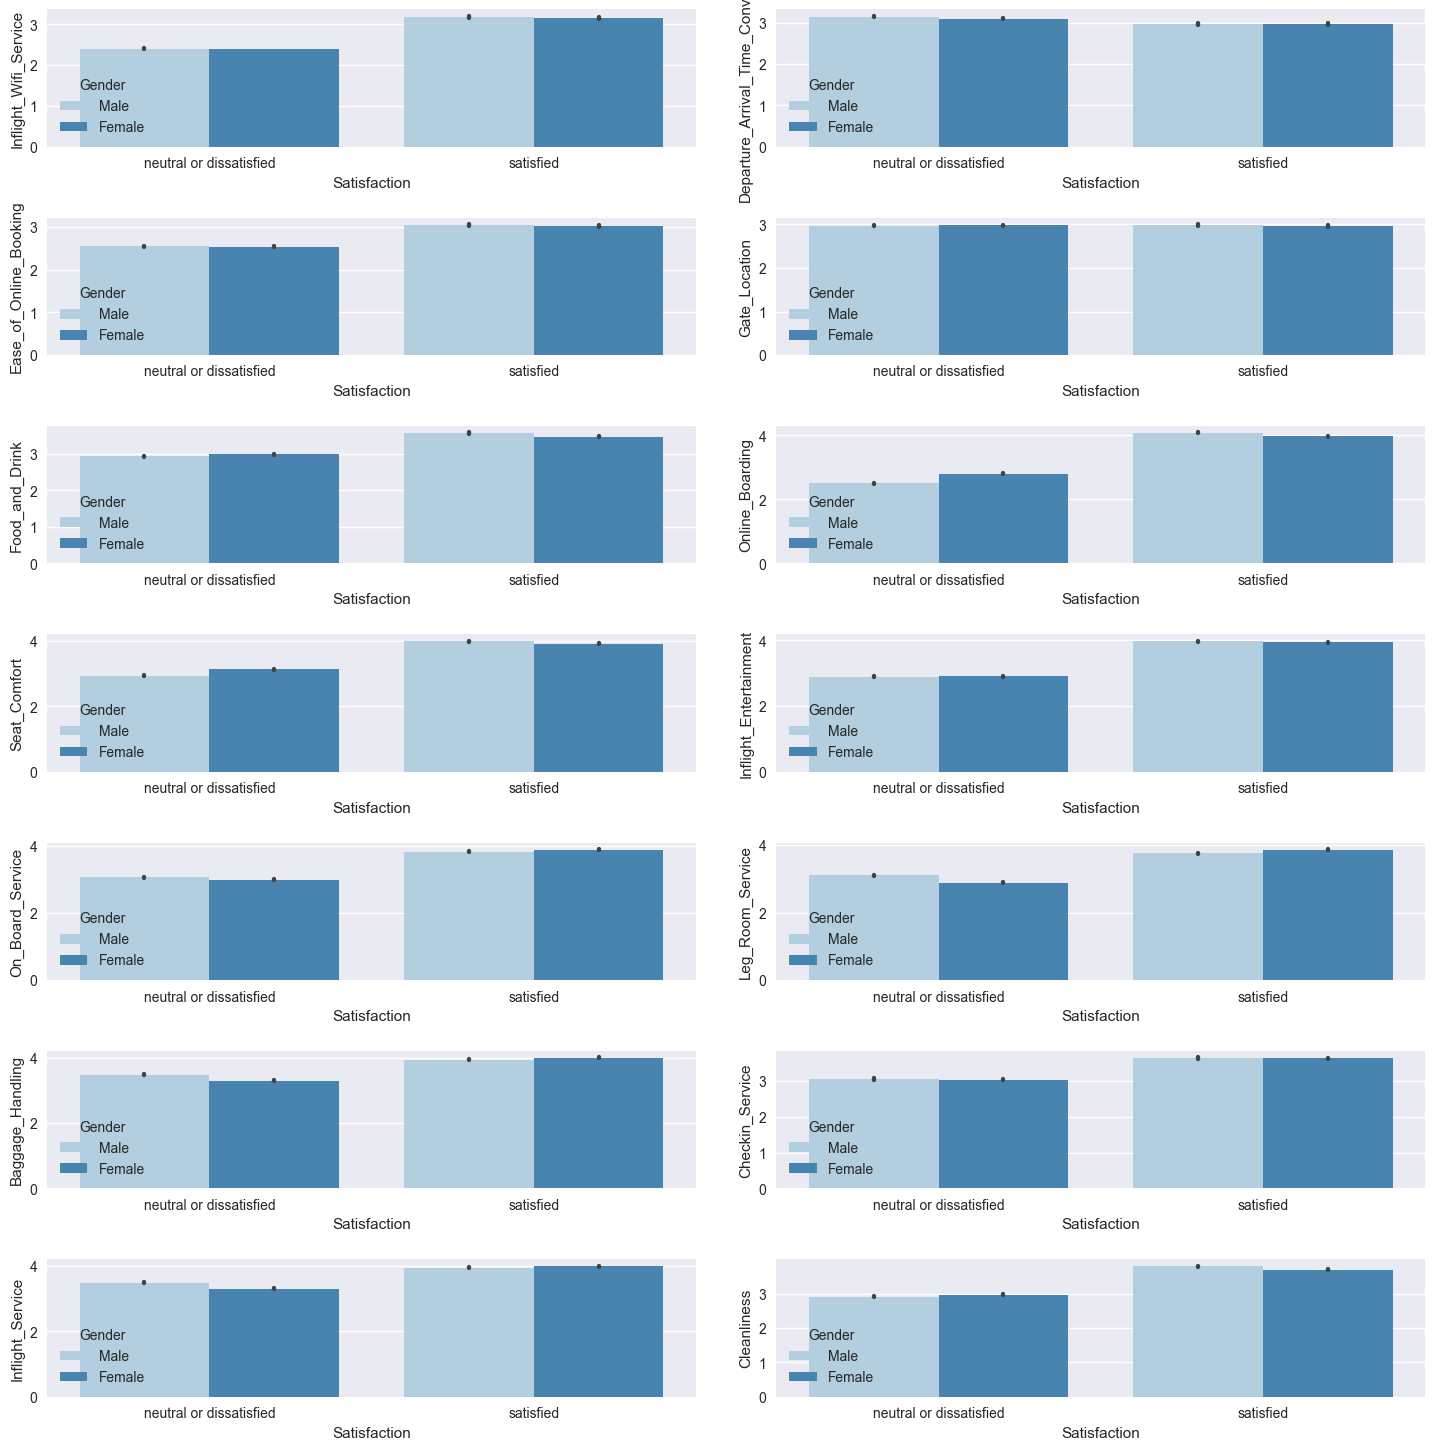

In [37]:
# Perbandingan kepuasan perempuan dan laki-laki untuk setiap kategori
RatingCol = TabelRating.select_dtypes(include =['int64','float64']).columns

def detail_barplot(category):
    fig, axs = plt.subplots(7, 2, figsize=(15, 15))
    
    fig.tight_layout(pad=3.0)
    for feature,ax in zip(RatingCol,axs.ravel()):
        ax = sns.barplot(ax=ax,x="Satisfaction", y=feature, hue=category,palette= 'Blues', data=df)

detail_barplot("Gender")

**Insight**

Dari grafik kepuasan penumpang perempuan dan laki-laki diatas, dapat dilihat bahwa laki-laki dan perempuan memiliki preferensi tertentu dalam menilai puas atau tidak. 

Perempuan Dilihat dari netral atau tidak puas:
- kenyamanan kursi
- makanan dan minuman
- kebersihan

Laki-laki Dilihat dari netral atau tidak puas:
- ruang kaki dalam pesawat
- penanganan bagasi
- service check-in
- pelayanan dalam penerbangan

Gender memberi pengaruh pada kepuasan penumpang apabila dilihat dari aspek diatas, akan tetapi sulit untuk melanjutkan segmentasi berdasarkan gender karena perbedaan laki-laki dan perempuan tidak terlalu signifikan.

### **Berdasarkan Usia**

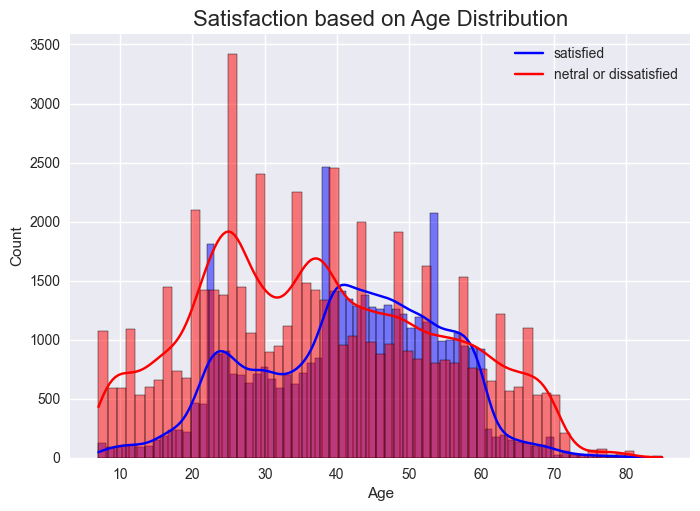

In [28]:
sns.histplot(x=df[df['Satisfaction']=='satisfied']['Age'],kde=True,color='blue')
sns.histplot(x=df[df['Satisfaction']=='neutral or dissatisfied']['Age'],kde=True,color='red')
plt.legend(labels=['satisfied','netral or dissatisfied'])
plt.title('Satisfaction based on Age Distribution', fontsize=16)
plt.show()

**Insight**:
- Dari grafik diatas, dapat dilihat sekilas bahwa distribusi tidak normal.
- Penumpang yang menjawab puas terhadap pelayanan maskapai berkisar diumur 40 sampai 60
- Sedangkan penumpang yang menjawab tidak puas memiliki fluktuasi, berkisar dari umur 20 sampai 40

Usia akan dibagi menjadi Kategori Usia sesuai dengan yang ditetapkan [BAPPENAS](https://sepakat.bappenas.go.id/wiki/Kelompok_Usia) :

- Di bawah 15 tahun: Kelompok usia anak-anak
- 15-24 tahun: Kelompok usia muda
- 25-34 tahun: Kelompok usia pekerja awal
- 35-44 tahun: Kelompok usia paruh baya
- 45-54 tahun: Kelompok usia pra-pensiun
- 55-64 tahun: Kelompok usia pensiun
- 65 tahun ke atas: Kelompok usia lanjut

In [29]:
TabelUmur = df.copy()

In [30]:
def KategoriUmur (Umur): 
    if Umur < 15: 
        return "Anak-anak"
    elif (Umur >= 15) & (Umur < 25): 
        return "Usia Muda"
    elif (Umur >= 25) & (Umur < 35):
        return "Pekerja Awal"
    elif (Umur >= 35) & (Umur < 45):
        return "Paruh Baya"
    elif (Umur >= 45) & (Umur < 55):
        return "Pra-pensiun"
    elif (Umur >= 55) & (Umur < 65):
        return "Pensiun"
    elif Umur>=65:
        return "Usia Lanjut"
    
TabelUmur["KategoriUmur"] = TabelUmur["Age"].apply(lambda Umur: KategoriUmur(Umur))
# Proporsi Umur terhadap Kepuasan Penumpang
ProporsiUmur = TabelProporsiKepuasan('KategoriUmur','Satisfaction',TabelUmur)
ProporsiUmur

Satisfaction,Neutral_Dissatisfied_Val,Satisfied_Val,Total,Neutral_Dissatisfied_%,Satisfied_%
KategoriUmur,,,,,
Anak-anak,4481,719,5200,86.17,13.83
Paruh Baya,11844,11650,23494,50.41,49.59
Pekerja Awal,12357,6998,19355,63.84,36.16
Pensiun,7091,6604,13695,51.78,48.22
Pra-pensiun,8905,11827,20732,42.95,57.05
Usia Lanjut,3834,854,4688,81.78,18.22
Usia Muda,9833,4616,14449,68.05,31.95


**Insight**:

- Segmen penumpang berdasarkan umur paling banyak adalah kelompok Paruh Baya, Pra-pensiun dan Pekerja Awal
- Segmen penumpang dengan kategori umur yang cukup puas dengan pelayanan adalah :
    - Pra-pensiun 57.05%
    - Paruh Baya 49.59%
    - Pensiun 48.22%
- Untuk kategori umur anak-anak didominasi tidak puas 86.17% susah menentukan apakah anak-anak benar-benar mengisi atau sekedar memilih tingkat kepuasan 
- kelompok Usia Muda dan Pekerja Awal, dengan persentase 'netral atau tidak puas' diatas 60%. Selain itu segmen penumpang ini memiliki proporsi yang tinggi dan harus dianalisa lebih lanjut sebagai pengaruh kepuasan penumpang untuk mengetahui aspek apa saja yang menjadi faktor 'netral atau tidak puas'.

Menguji hipotesis apabila Umur mempengaruhi kepuasan penumpang dengan chi squared contingency

In [31]:
df_ct = pd.crosstab(TabelUmur['KategoriUmur'],TabelUmur['Satisfaction'])
score, pval, dof,exp=chi2_contingency(df_ct)
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


Uji statistik chi squared contingency menunjukkan Tolak Ho, dimana Ho adalah tidak ada nya pengaruh dari umur terhadap kepuasan. Sehingga dari Tolak Ho dibuktikan bahwa adanya pengaruh umur terhadap kepuasan penumpang. Analisa akan dilanjutkan berdasarkan kelompok Pekerja Awal dan Usia Muda.

Mengambil baris berdasarkan Kelompok Usia Muda dan Pekerja Awal

In [32]:
indexNames = TabelUmur[TabelUmur['KategoriUmur'].isin(['Anak-anak','Paruh Baya','Pensiun','Pra-pensiun','Usia Lanjut'])].index
TabelUmur.drop(indexNames, inplace=True)
TabelUmur['KategoriUmur'].unique()

array(['Pekerja Awal', 'Usia Muda'], dtype=object)

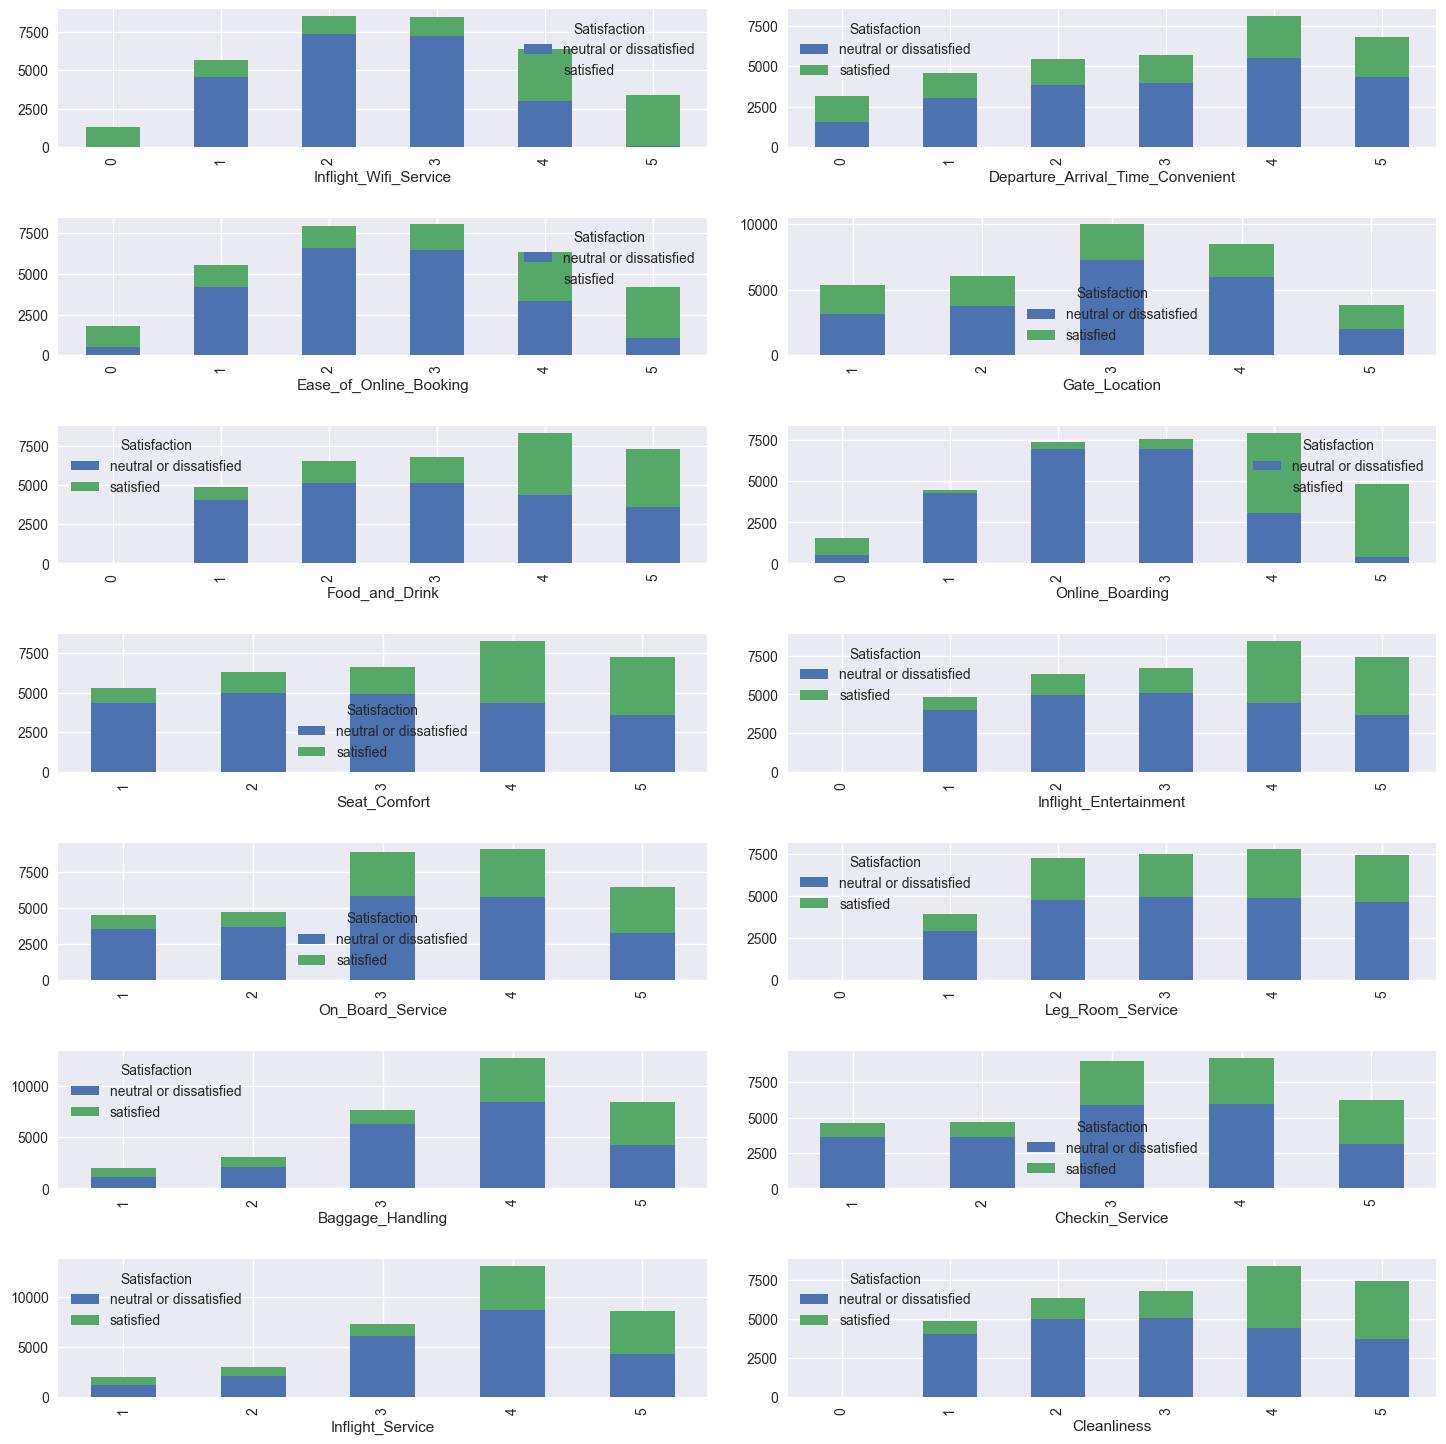

In [40]:
Rating("Satisfaction",TabelUmur)

**Insight**
Dari grafik nilai rating terhadap kepuasan penumpang kelompok Usia Muda dan Pekerja Awal diatas, beberapa hal dapat disimpulkan:

- Dapat dilihat aspek mana saja yang mempengaruhi kepuasan dilihat dari jumlah rating dan kepuasan. Seperti contohnya, banyaknya orang mengisi nilai 4 pada aspek Departure Arrival Time Convenient, tetapi dominan penumpang tidak puas, sehingga aspek tersebut diasumsikan tidak terlalu mempengaruhi kepuasan berdasarkan usia.
- Dari nilai rating (0: Tidak diisi, 1(Buruk) sampai 5(Baik)), aspek yang mempengaruhi kelompok Usia Muda dan Pekerja Awal mengisi 'netral atau tidak puas' adalah Inflight Wifi Service(Wifi dalam penerbangan), Ease of Online Booking (Kemudahan booking secara online), dan Gate Location (Lokasi Gerbang). Sedangkan terdapat juga beberapa hal yang dapat ditingkatkan yaitu Online Boarding (Boarding secara online).

### **Berdasrkan Kelas Penerbangan**

Terdapat tiga kelas penerbangan, yaitu Eco, Eco Plus, dan Business. Akan dilakukan analisa proporsi masing-masing kelas terhadap kepuasan.

In [41]:
TabelProporsiKepuasan('Class','Satisfaction',df)

Satisfaction,Neutral_Dissatisfied_Val,Satisfied_Val,Total,Neutral_Dissatisfied_%,Satisfied_%
Class,,,,,
Business,14691,32731,47422,30.98,69.02
Eco,38010,8696,46706,81.38,18.62
Eco Plus,5644,1841,7485,75.40,24.60


**Insight**:
- Kelas yang paling banyak digunakan adalah business dan eco
- Segmen penumpang berdasarkan tipe travel bisnis, cenderung menggunakan kelas bisnis dan cenderung 'puas', sedangakan yang menggunakan kelas eco dan eco plus cenderung 'netral atau tidak puas'

## **`Kesimpulan Dan Rekomendasi`**

#### **Kesimpulan**
Adapun kesimpulan yang didapat dari hasil analisa, antara lain:

1. Apakah penumpang merasa puas dengan layanan yang diberikan ?
    - penumpang cenderung netral atau tidak puas dengan pelayanan yang diberikan maskapai penerbangan sebanyak 57,42%. 
    - Kelompok Usia Muda dan Pekerja Awal cenderung mengisi 'netral atau tidak puas' dengan masing-masing persentase diatas 60%, dan kelompok tersebut termasuk kelompok yang mendominasi pasar penumpang yang merasa pelayanan tidak memenuhi harapan penumpang
    - Orang yang menggunakan kelas bisnis cenderung puas dengan pelayanan yang diberikan, dengan persentase puas 69%.
2. Apa saja faktor yang mempengaruhi kepuasan penumpang ?
    - berdasarkan Gender :
        - Perempuan Dilihat dari netral atau tidak puas:
            - kenyamanan kursi
            - makanan dan minuman
            - kebersihan

        - Laki-laki Dilihat dari netral atau tidak puas:
            - ruang kaki dalam pesawat
            - penanganan bagasi
            - service check-in
            - pelayanan dalam penerbangan
    - berdasarkan umur :
        - Kelompok Usia Muda dan Pekerja Awal menilai rendah aspek berikut:
            - Wifi dalam penerbangan
            - Kemudahan booking secara online
            - Lokasi Gerbang
            - Boarding secara online

        
    

### **Rekomendasi**

- Hal yang paling harus diperhatikan adalah mengganti wifi dalam penerbangan dengan kualitas yang lebih baik mengingat tingginya demand penggunaan wifi saat travel. Selain itu kemudahan booking secara online dan boarding secara online, yang dapat ditingkatkan dengan membuat aplikasi dengan fitur yang lebih mengikuti jaman atau up-to-date sehingga lebih mudah dimengerti dan memudahkan penumpang dalam online booking dan online boarding
- meningkatkan kenyamanan kursi, makanan dan minuman, dan hiburan dalam pesawat pada kelas ekonomi, mengingat pengguna kelas ekonomi mendominasi pasar dan tidak puas terhadap layanan sekarang
- Strategi marketing dapat menargetkan kelompok usia muda dan pekerja awal sebagai target pasar untuk mencari lead customer baru dan meng-convert disloyal customer menjadi loyal customer